<a href="https://colab.research.google.com/github/DawidK4/MyNotebooks/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path = '/content/drive/MyDrive/'
housing = pd.read_csv(path + 'Housing.csv', header='infer')

Mounted at /content/drive


In [ ]:
housing.shape
print(housing.info())
print(list(housing.columns))
print(housing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
          longitude      latitude  housing_median_age   total_rooms  \
count  2

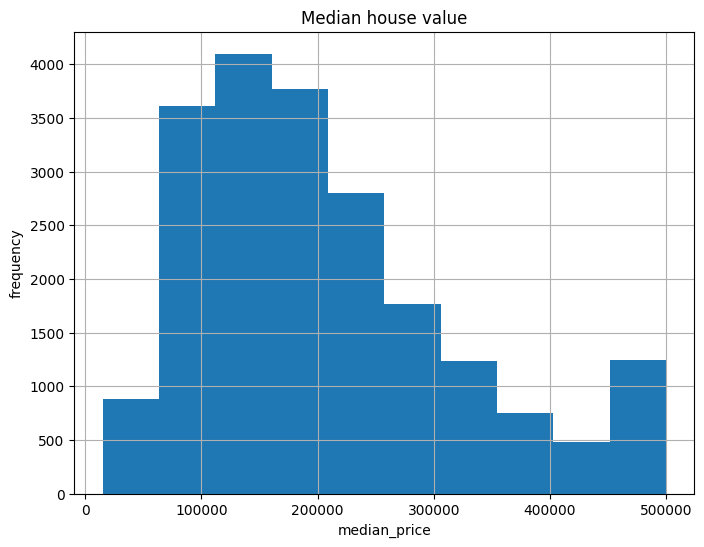

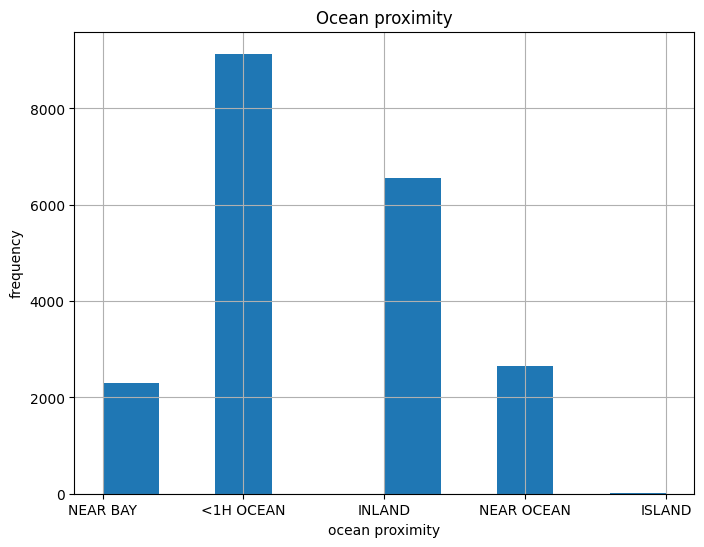

Number of unique values in 'ocean_proximity':  5
Missing values: longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Outliers in total bedrooms: Series([], Name: total_bedrooms, dtype: float64)
Outliers in total_rooms: 1         7099.0
101       5806.0
104       5871.0
185       5963.0
283      12842.0
          ...   
20543     6861.0
20544     8800.0
20563    12139.0
20567     6809.0
20629    10035.0
Name: total_rooms, Length: 1287, dtype: float64


In [ ]:
housing['median_house_value'].describe()

%matplotlib inline
import matplotlib.pyplot as plt
housing['median_house_value'].hist(bins=10, figsize=(8, 6))
plt.ylabel('frequency')
plt.xlabel('median_price')
plt.title('Median house value')
plt.show()

housing['ocean_proximity'].hist(bins=10, figsize=(8, 6))
plt.ylabel('frequency')
plt.xlabel('ocean proximity')
plt.title("Ocean proximity")
plt.show()

num_unique_ocean_proximity = housing['ocean_proximity'].nunique()
print(f"Number of unique values in 'ocean_proximity':  {num_unique_ocean_proximity}")

missing_values = housing.isnull().sum()
print(f"Missing values: {missing_values}")

import numpy as np

def find_outliers_IQR(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers

outliers_total_bedrooms = find_outliers_IQR(housing['total_bedrooms'])
print("Outliers in total bedrooms:", outliers_total_bedrooms)

outliers_total_rooms = find_outliers_IQR(housing['total_rooms'])
print("Outliers in total_rooms:", outliers_total_rooms)

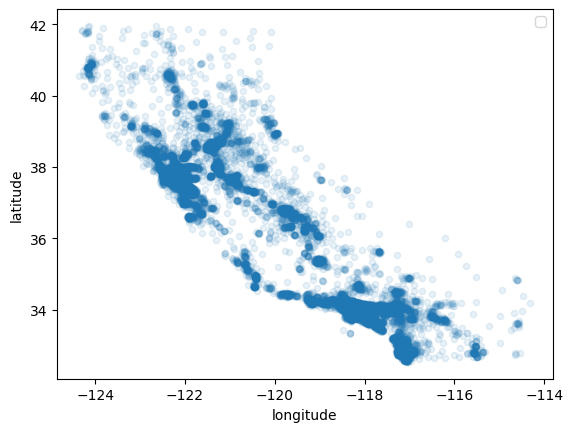

In [ ]:
from matplotlib.pyplot import savefig

# housing.plot(kind="scatter", x="longitude", y="latitude")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.legend()

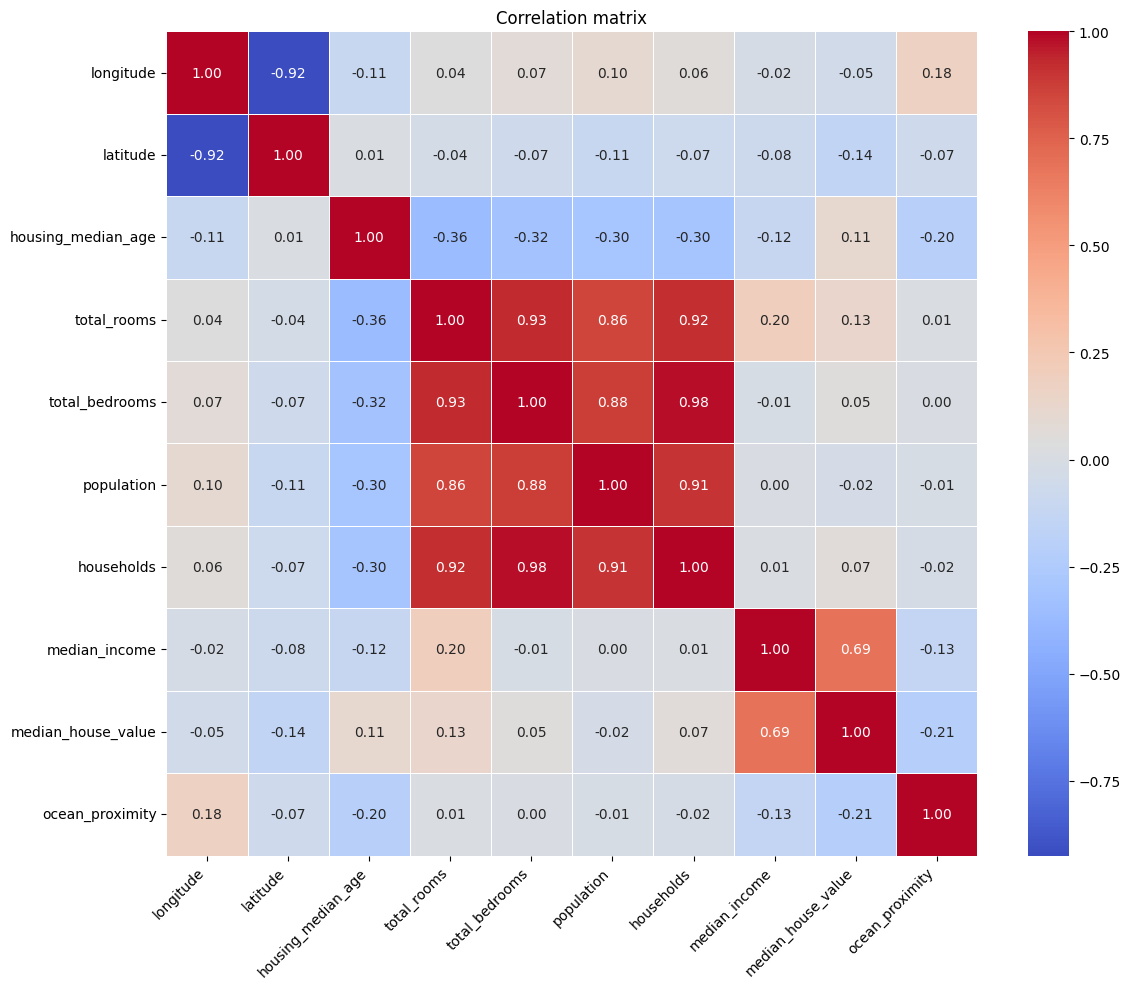

In [ ]:
housing['ocean_proximity'].unique()
mapping = {'NEAR BAY': 1, "<1H OCEAN":2, 'INLAND':3, 'NEAR OCEAN':4, 'ISLAND':5}
housing['ocean_proximity'] = housing['ocean_proximity'].map(mapping)

import seaborn as sns

correlation_matrix = housing.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title("Correlation matrix")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

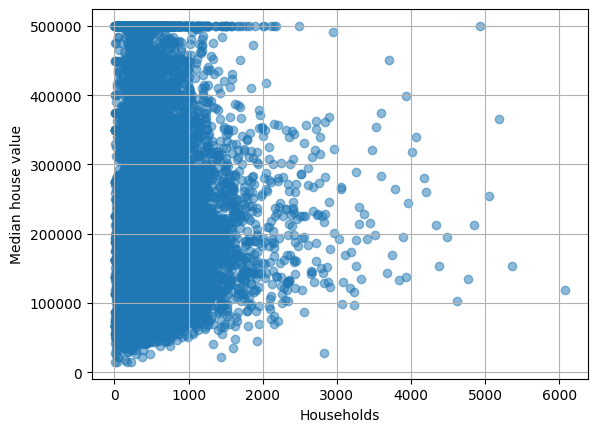

In [ ]:
y = housing['median_house_value']
x = housing['households']

plt.scatter(x, y, alpha=0.5)
plt.xlabel("Households")
plt.ylabel("Median house value")
plt.grid(True)
plt.show()

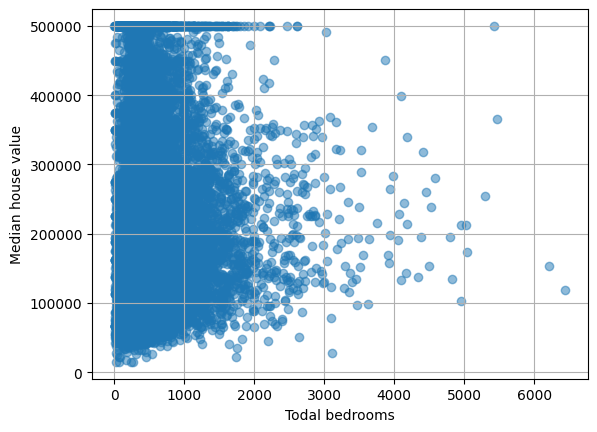

In [ ]:
x = housing['total_bedrooms']

plt.scatter(x, y, alpha=0.5)
plt.xlabel("Todal bedrooms")
plt.ylabel("Median house value")
plt.grid(True)
plt.show()

In [ ]:
correlations = housing.corr()['median_house_value'].sort_values(ascending=False)
correlations = correlations.drop('median_house_value')
print(correlations)

top_5_variables = correlations.head(5).index.tolist()
print("\nTop 5 most important variables:", top_5_variables)

median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
ocean_proximity      -0.210600
Name: median_house_value, dtype: float64

Top 5 most important variables: ['median_income', 'total_rooms', 'housing_median_age', 'households', 'total_bedrooms']


In [ ]:
housing = housing.fillna(housing.mean())

In [ ]:
from sklearn.model_selection import train_test_split

numerical_cols = housing.select_dtypes(include=np.number).columns

housing[numerical_cols] = housing[numerical_cols].fillna((housing[numerical_cols].mean()))

X = housing.drop('median_house_value', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, housing['median_house_value'], test_size=0.3, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error: ", mse)

Mean Squared Error:  69639.3225618491


In [ ]:
housing_no_outliers = housing[~housing['total_bedrooms'].isin(find_outliers_IQR(housing['total_bedrooms']))]
housing_no_outliers = housing_no_outliers[~housing_no_outliers['total_rooms'].isin(find_outliers_IQR(housing_no_outliers['total_rooms']))]

numerical_cols = housing_no_outliers.select_dtypes(include=np.number).columns

housing_no_outliers[numerical_cols] = housing_no_outliers[numerical_cols].fillna(housing_no_outliers[numerical_cols].mean())

X = housing_no_outliers.drop('median_house_value', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, housing_no_outliers['median_house_value'], test_size=0.3, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error (after removing outliers):", mse)

Mean Squared Error (after removing outliers): 70062.95484357557


In [ ]:
housing['rooms_Ave'] = housing['total_rooms'] / housing['households']
housing['bedrooms_Ave'] = housing['total_bedrooms'] / housing['households']
housing['persons_per_house'] = housing['population'] / housing['households']

housing = housing.drop(['total_rooms', 'total_bedrooms', 'population'], axis=1)

X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error (after creating new features):", mse)

Mean Squared Error (after creating new features): 82132.89947662057


1.
Variables with higher absolute correlation values are generally considered more important. Based on your output, the top 5 most important variables are likely:

median_income
ocean_proximity
rooms_Ave
bedrooms_Ave
housing_median_age

2.
Yes, but only slightly

3.
No it does not

4.
The best MSE score is the model using dataset without outliers, but also without the new values.

Linear regression

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
housing_predictions = model.predict(X_test)

lin_mse = mean_squared_error(y_test, housing_predictions)
lin_mse = np.sqrt(lin_mse)
lin_mse

82086.52271872535

Linear regression with L1 regulation (Ridge)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, LassoCV
from numpy import arange

model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
results = search.fit(X_train, y_train)

print("MAE: %.3f" % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -52781.594
Config: {'alpha': 0.0}


Ridge: Parameter tuning

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.99)
model.fit(X_train, y_train)
housing_predicitons = model.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

82086.52271872535

Linear regression with L2 regulation (Lasso)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=10)
model.fit(X_train, y_train)
housing_predictions = model.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

63042.954896997384

Regression Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from numpy import arange

model = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['max_depth'] = arange(1, 20, 2)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Regression Decision Tree: Parameter tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, criterion='squared_error')
model.fit(X_train, y_train)
housing_predictions = model.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predicitons)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Random Forest

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

X = np.arange(0, 100, 1)

y = y_test[:100]
z = housing_predictions[:100]

plt.plot(X, y, color='r', label='true value')
plt.plot(X, z, color='g', label='pred value')

plt.xlabel("Test record number")
plt.ylabel("Median_house_value")
plt.title("Predicted vs. true values")